In [1]:
import pickle as pkl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import utils
import models
import GraphKernel
from grakel.kernels import NeighborhoodSubgraphPairwiseDistance


In [2]:
path = 'data/'
with open(path + 'training_data.pkl', 'rb') as file: 
    train_graphs = pkl.load(file) 

with open(path + 'test_data.pkl', 'rb') as file: 
    test_graphs = pkl.load(file) 
    
with open(path + 'training_labels.pkl', 'rb') as file: 
    train_labels = pkl.load(file) 

In [ ]:
sdfsdf

In [3]:
randomWalk = GraphKernel.ShortestPath()#GraphKernel.RandomWalkKernel(n_iterations = 2)
K_train = randomWalk.compute_kernel(train_graphs,train_graphs)
K_train

100%|██████████| 6000/6000 [06:07<00:00, 16.34it/s]


array([[ 3408.,  6741.,  3279., ...,   116.,  2790.,   988.],
       [ 6741., 16082.,  6977., ...,   112.,  5484.,  1799.],
       [ 3279.,  6977.,  3440., ...,    92.,  2774.,   917.],
       ...,
       [  116.,   112.,    92., ...,   120.,   172.,   166.],
       [ 2790.,  5484.,  2774., ...,   172.,  3160.,  1140.],
       [  988.,  1799.,   917., ...,   166.,  1140.,   944.]])

In [4]:
K_test = randomWalk.compute_kernel(test_graphs,train_graphs)

100%|██████████| 2000/2000 [02:46<00:00, 12.03it/s]


In [5]:
y_train = train_labels
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = 5, kernel='precomputed',  probability=True)

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_train)

print("Classification accuracy: %0.2f" % accuracy_score(y_train, y_pred))

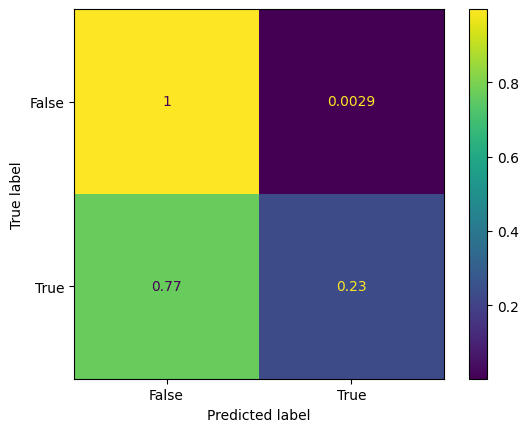

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_train)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_train, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_train, y_train)

In [ ]:
y_pred = clf.predict_proba(K_train)[:,0]
y_pred = np.log(y_pred/(1-y_pred))
y_pred

array([2.2731275 , 1.82089445, 2.05162844, ..., 3.17205867, 1.98600037,
       4.39832262])